In [1]:
#Importing libraries

import os
import pandas as pd 
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

colors = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = colors, n_colors = 4)

print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Deprecation warning will be ignored!


In [2]:
#Uploading the 5 excel sheets consisting the GTD data

xl_1=pd.ExcelFile(r"C:\Users\aniru\OneDrive\Desktop\Studies\Data Science\Fellowship.AI\data1.xlsx") #Uploading Excel sheet1
xl_2=pd.ExcelFile(r"C:\Users\aniru\OneDrive\Desktop\Studies\Data Science\Fellowship.AI\data2.xlsx") #Uploading Excel sheet2
xl_3=pd.ExcelFile(r"C:\Users\aniru\OneDrive\Desktop\Studies\Data Science\Fellowship.AI\data3.xlsx") #Uploading Excel sheet3
xl_4=pd.ExcelFile(r"C:\Users\aniru\OneDrive\Desktop\Studies\Data Science\Fellowship.AI\data4.xlsx") #Uploading Excel sheet4
xl_5=pd.ExcelFile(r"C:\Users\aniru\OneDrive\Desktop\Studies\Data Science\Fellowship.AI\data5.xlsx") #Uploading Excel sheet5

print('Excel Files of GTD Uploaded!')

Excel Files of GTD Uploaded!


In [3]:
#Parsing the excel sheets to be suitable for pandas dataframe. 
#The sheets are named as "Data" in all the five GTD excel files.

df_1= xl_1.parse("Data") #Excel sheet1 parsed into dataframe1 (df_1)
df_2= xl_2.parse("Data") #Excel sheet2 parsed into dataframe2 (df_2)
df_3= xl_3.parse("Data") #Excel sheet3 parsed into dataframe3 (df_3)
df_4= xl_4.parse("Data") #Excel sheet4 parsed into dataframe4 (df_4)
df_5= xl_5.parse("Data") #Excel sheet5 parsed into dataframe5 (df_5)

print('Excel sheets converted to DataFrames!')

Excel sheets converted to DataFrames!


In [4]:
#Appending all the 5 dataframes into a single dataframe

#df_2 has been appended into df_1
df_1=df_1.append(df_2, ignore_index=True)
#df_3 has been appended into df_1
df_1=df_1.append(df_3, ignore_index=True)
#df_4 has been appended into df_1
df_1=df_1.append(df_4, ignore_index=True)
#df_5 has been appended into df_1
df_1=df_1.append(df_5, ignore_index=True)


In [5]:
# The number of rows and columns of terror_df, found out by pd.Dataframe.shape

#df_1 acts as a backup dataframe 
terror_df=df_1.copy()

terror_df.head(10)

#terror_df is the copy of df1 where all other dataframes have been appended

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
terror_df.shape

(341447, 135)

In [7]:
# To avoid confusion,the dataset is restricted to only attacks that were of terrorist nature.

terror_df = terror_df[(terror_df.crit1 == 1) & (terror_df.crit2 == 1) & (terror_df.crit3 == 1) & (terror_df.doubtterr == 0)]

In [8]:
#missing value counts in each of these columns

miss = terror_df.isnull().sum()/len(terror_df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss


ishostkid           0.001237
guncertain1         0.001936
specificity         0.002047
city                0.003103
target1             0.003487
natlty1_txt         0.008972
natlty1             0.008972
latitude            0.024054
longitude           0.024054
nkill               0.048841
provstate           0.059937
targsubtype1_txt    0.061139
targsubtype1        0.061139
nwound              0.079079
weapsubtype1_txt    0.091918
weapsubtype1        0.091918
corp1               0.240324
nkillus             0.314868
nwoundus            0.316358
claimed             0.323136
summary             0.323144
scite1              0.323597
nkillter            0.325207
nwoundte            0.335330
nperpcap            0.345374
weapdetail          0.360233
nperps              0.368014
scite2              0.542698
ransom              0.608262
propextent_txt      0.612602
                      ...   
targtype3_txt       0.993133
targtype3           0.993133
target3             0.993133
natlty3_txt   

In [9]:
frac = len(terror_df) * 0.8
terror_df=terror_df.dropna(thresh=frac, axis=1)
terror_df= terror_df.replace(-9,0)
terror_df= terror_df.drop(["city"], axis=1)
print('Removing columns having 80% of missing values')

Removing columns having 80% of missing values


In [10]:
#missing value counts in each of these columns

miss = terror_df.isnull().sum()/len(terror_df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

ishostkid           0.001237
guncertain1         0.001936
specificity         0.002047
target1             0.003487
natlty1             0.008972
natlty1_txt         0.008972
latitude            0.024054
longitude           0.024054
nkill               0.048841
provstate           0.059937
targsubtype1        0.061139
targsubtype1_txt    0.061139
nwound              0.079079
weapsubtype1        0.091918
weapsubtype1_txt    0.091918
dtype: float64

In [11]:
terror_df.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

terror_df.gname = terror_df.gname.str.lower()

In [12]:
terror_df['ncasualties'] = terror_df['nkill'] + terror_df['nwound']
terror_df['has_casualties'] = terror_df['ncasualties'].apply(lambda x: 0 if x == 0 else 1)
terror_df= terror_df.drop(['nkill', 'nwound', 'ncasualties'], axis=1)

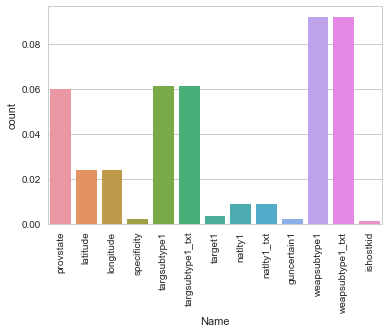

In [13]:
#visualising missing values
miss = terror_df.isnull().sum()/len(terror_df)
miss = miss[miss > 0]
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [14]:
terror_df['specificity'] = terror_df['specificity'].fillna(terror_df['specificity'].mode()[0])
terror_df['natlty1'] = terror_df['natlty1'].fillna(terror_df['natlty1'].mode()[0])

terror_df['guncertain1'] = terror_df['guncertain1'].fillna(terror_df['guncertain1'].fillna(0))
terror_df['targsubtype1'] = terror_df['targsubtype1'].fillna(terror_df['targsubtype1'].fillna(0))
terror_df['weapsubtype1'] = terror_df['weapsubtype1'].fillna(terror_df['weapsubtype1'].fillna(0))
terror_df['ishostkid'] = terror_df['ishostkid'].fillna(terror_df['ishostkid'].fillna(0))
terror_df['latitude'] = terror_df['latitude'].fillna(terror_df['latitude'].fillna(0))
terror_df['longitude'] = terror_df['longitude'].fillna(terror_df['longitude'].fillna(0))

print("Numerical variables Imputed!")

Numerical variables Imputed!


In [15]:
for col in ("target1","natlty1_txt", "provstate", "targsubtype1_txt", "weapsubtype1_txt"):
    terror_df[col] = terror_df[col].fillna("None")
print("Categorical variables Imputed!")


Categorical variables Imputed!


In [16]:
unknown_df= terror_df[terror_df['gname'] == "unknown"]

In [17]:
terror_df=terror_df[~terror_df.isin(unknown_df)]
terror_df= terror_df.dropna()

In [18]:
terror_df=terror_df.drop(["iyear", "eventid", "imonth", "iday", "extended"], axis=1)
terror_df= terror_df.dropna()

unknown_df=unknown_df.drop(["iyear", "eventid", "imonth", "iday", "extended"], axis=1)
unknown_df= unknown_df.dropna()

In [19]:
Y = pd.DataFrame()
Y = terror_df["gname"]
Y_count= Y.value_counts()

In [20]:
Y_bins=pd.qcut(Y_count, [0, .5, .75, 1], labels=["Small Org", "Medium Org" ,"Dangerous Groups"])
Y_bins= Y_bins.to_dict()

Y=Y.reset_index()
Y=Y.drop(["index"], axis=1)

Label = []

for x in Y["gname"]:
    for key, value in Y_bins.items():
           if x==key:
            Label.append(value)

Y["Label"]= pd.Series(Label)

In [21]:
Y['Label'].head(5)

0           Small Org
1    Dangerous Groups
2    Dangerous Groups
3    Dangerous Groups
4          Medium Org
Name: Label, dtype: object

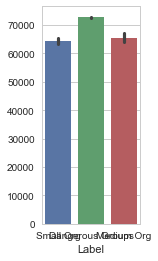

In [22]:
plt.subplot(1, 3, 3)
sns.barplot(x="Label", y=Y.index, data=Y);

In [23]:
Y['Label'] = Y['Label'].map({"Small Org":1, "Medium Org":2, "Dangerous Groups":3})
Y['Label'].shape

(144588L,)

In [24]:
terror_df["Label"]= Y["Label"].values

In [25]:
terror_df= terror_df.drop(["gname"], axis=1)

In [26]:
print(terror_df["Label"])

0         1
1         3
5         3
6         3
8         2
9         2
13        3
15        1
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
27        2
28        3
30        3
31        3
32        3
33        3
36        3
37        3
38        3
42        3
46        3
47        3
48        3
50        3
         ..
341378    3
341379    3
341382    3
341383    3
341384    3
341385    3
341386    3
341388    3
341389    3
341390    3
341393    3
341396    3
341398    3
341403    3
341404    3
341405    3
341406    3
341407    3
341409    3
341412    3
341413    3
341414    3
341415    3
341416    3
341418    3
341427    3
341430    3
341431    3
341440    3
341444    3
Name: Label, Length: 144588, dtype: int64


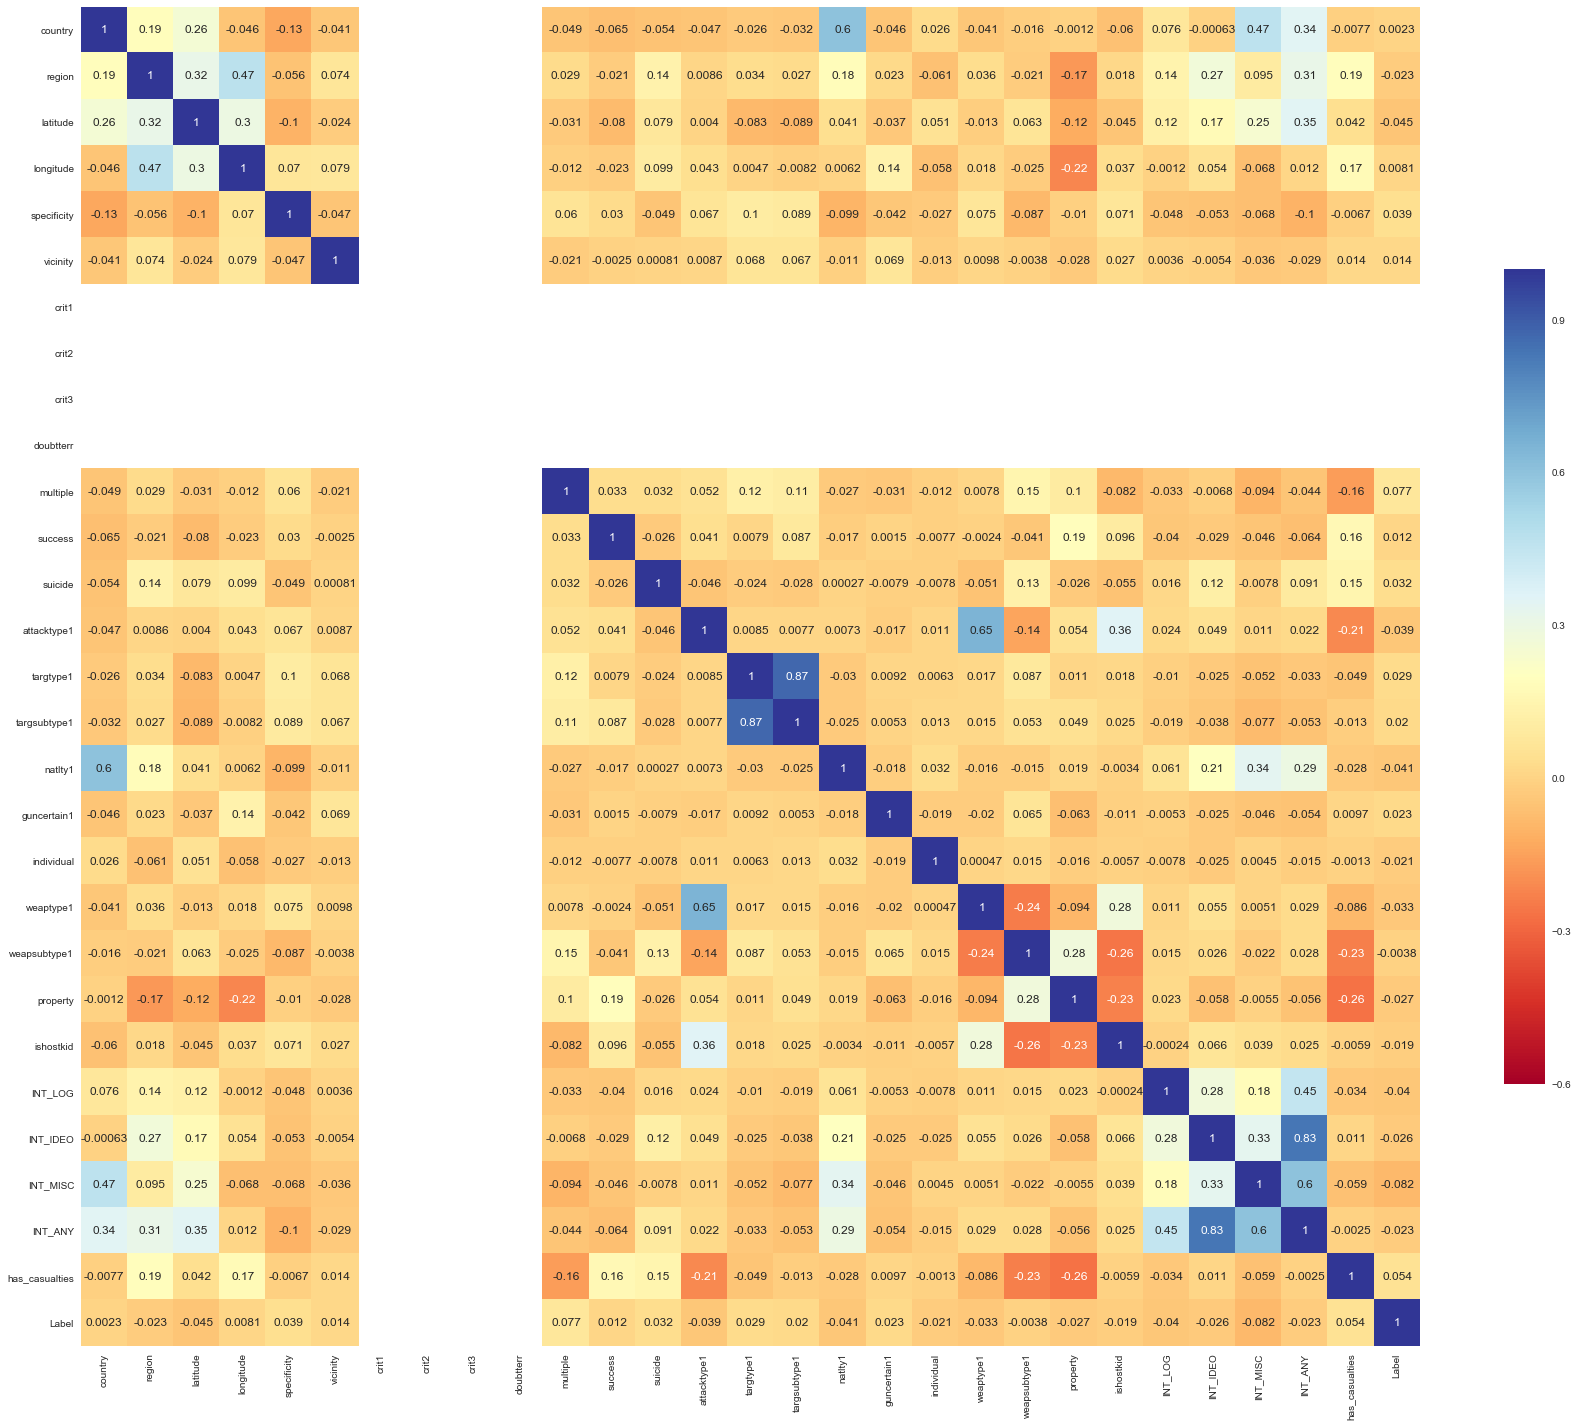

In [27]:
corr = terror_df.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [28]:
print (corr['Label'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Label'].sort_values(ascending=False)[-5:]) #last 5 values`

(Label             1.000000
multiple          0.076888
has_casualties    0.054064
specificity       0.039086
suicide           0.031898
targtype1         0.029482
guncertain1       0.023083
targsubtype1      0.020275
vicinity          0.014006
success           0.012212
longitude         0.008118
country           0.002304
weapsubtype1     -0.003791
ishostkid        -0.018648
individual       -0.020793
Name: Label, dtype: float64, '\n')
----------------------
INT_MISC    -0.082009
crit1             NaN
crit2             NaN
crit3             NaN
doubtterr         NaN
Name: Label, dtype: float64


In [29]:
#Write about polynomials

In [30]:
unknown_df= unknown_df.drop(["gname"], axis= 1)

In [31]:
y_train = terror_df.Label.values

In [32]:
terror_df= terror_df.drop(["Label"], axis= 1)

In [33]:
ntrain = terror_df.shape[0]
ntest = unknown_df.shape[0]

all_data= pd.concat((terror_df, unknown_df)).reset_index(drop=True)

print("all_data shape: {}".format(all_data.shape))

all_data shape: (260373, 39)


In [34]:
cols = terror_df.columns
 
num_cols = terror_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[u'attacktype1_txt',
 u'natlty1_txt',
 u'targtype1_txt',
 u'weaptype1_txt',
 u'provstate',
 u'targsubtype1_txt',
 u'country_txt',
 u'dbsource',
 u'region_txt',
 u'weapsubtype1_txt',
 u'target1']

In [35]:
all_data["targtype1_txt"] = pd.get_dummies(all_data["targtype1_txt"])
all_data["region_txt"] = pd.get_dummies(all_data["region_txt"])
all_data["country_txt"] = pd.get_dummies(all_data["country_txt"])
all_data["dbsource"] = pd.get_dummies(all_data["dbsource"])
all_data["provstate"] = pd.get_dummies(all_data["provstate"])

In [36]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(all_data["attacktype1_txt"])
list(le.classes_)
all_data["attacktype1_txt"]= pd.Series(list(le.transform(all_data["attacktype1_txt"]))) 

le_2 = preprocessing.LabelEncoder()
le_2.fit(all_data["weapsubtype1_txt"])
list(le_2.classes_)
all_data["weapsubtype1_txt"]= pd.Series(list(le_2.transform(all_data["weapsubtype1_txt"]))) 

le_3 = preprocessing.LabelEncoder()
le_3.fit(all_data["target1"])
list(le_3.classes_)
all_data["target1"]= pd.Series(list(le_3.transform(all_data["target1"]))) 

le_4 = preprocessing.LabelEncoder()
le_4.fit(all_data["weaptype1_txt"])
list(le_4.classes_)
all_data["weaptype1_txt"]= pd.Series(list(le_4.transform(all_data["weaptype1_txt"]))) 

le_5 = preprocessing.LabelEncoder()
le_5.fit(all_data["targsubtype1_txt"])
list(le_5.classes_)
all_data["targsubtype1_txt"]= pd.Series(list(le_5.transform(all_data["targsubtype1_txt"]))) 

le_6 = preprocessing.LabelEncoder()
le_6.fit(all_data["natlty1_txt"])
list(le_6.classes_)
all_data["natlty1_txt"]= pd.Series(list(le_6.transform(all_data["natlty1_txt"]))) 

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
all_data=sc.fit_transform(all_data)


In [38]:
all_data = pd.DataFrame(all_data)

In [39]:
#creating train and test datasets

train = all_data[:ntrain]
test = all_data[ntrain:]

print(train.shape)
print(test.shape)

(144588, 39)
(115785, 39)


In [40]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

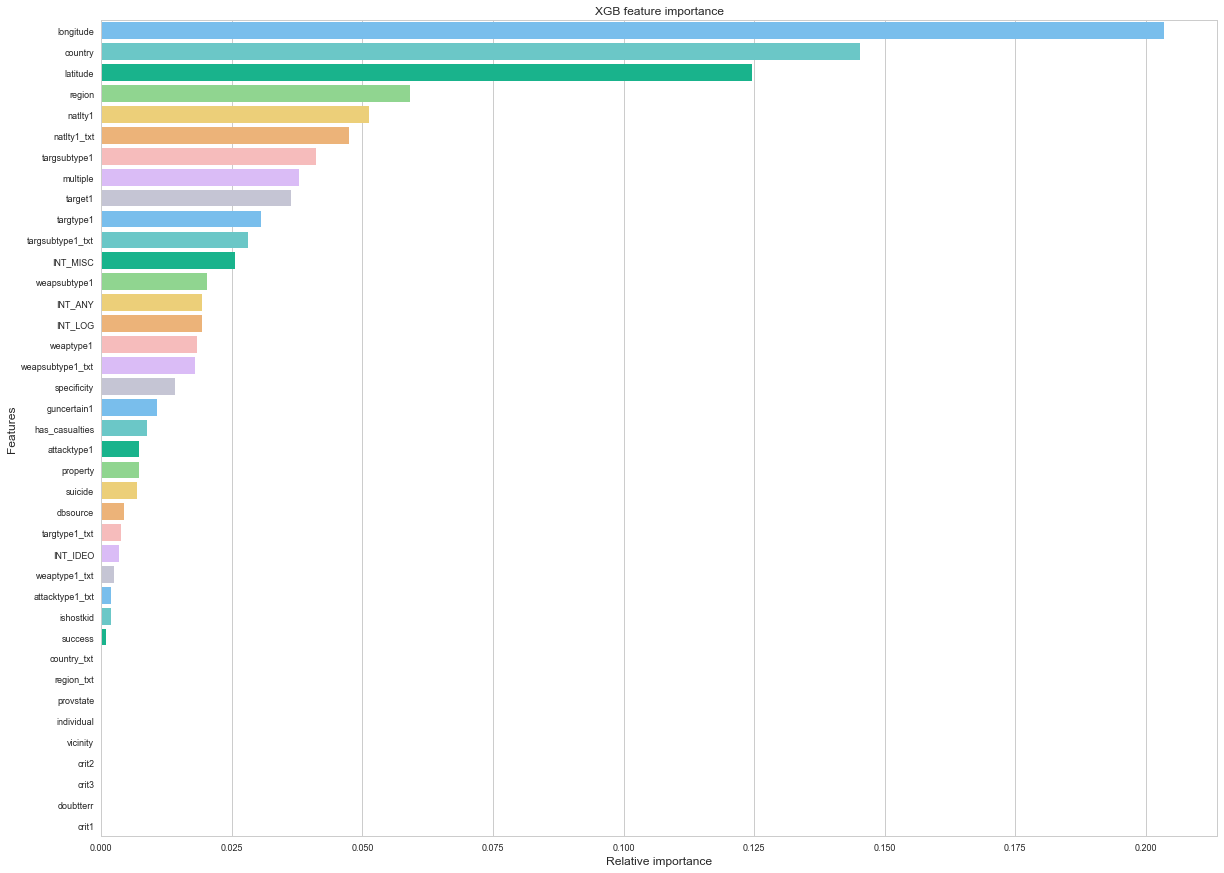

In [41]:
# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=cols[indices], x = model.feature_importances_[indices], orient='h', palette = colors)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [42]:
train_2 = train.copy()
test_2 = test.copy()

In [43]:
from sklearn.feature_selection import SelectFromModel

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
train = xgb_feat_red.transform(train)
test = xgb_feat_red.transform(test)


print("Results of 'feature_importances_':")
print('X_train: ', train.shape, '\nX_test: ', test.shape)

Results of 'feature_importances_':
('X_train: ', (144588L, 12L), '\nX_test: ', (115785L, 12L))


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [45]:
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

('X_train: ', (101211L, 12L), '\nX_test: ', (43377L, 12L), '\nY_train: ', (101211L,), '\nY_test: ', (43377L,))


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

print('Validation and metric libraries imported')

Validation and metric libraries imported


In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

print('Classification Models imported')

Classification Models imported


In [48]:
names = ["K-Nearest Neighbors", "Linear SVM",  "Naive Bayes", "Decision Tree", "Neural Net"]

models= [ KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), GaussianNB(), DecisionTreeClassifier(max_depth=5), MLPClassifier(alpha=1)]

In [49]:
# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'accuracy').mean()
    test_results = accuracy_score(Y_test, alg.predict(X_test)).mean()
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

(1, 'KNeighborsClassifier', 'trained...')
(2, 'SVC', 'trained...')
(3, 'GaussianNB', 'trained...')
(4, 'DecisionTreeClassifier', 'trained...')
(5, 'MLPClassifier', 'trained...')


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KNeighborsClassifier,"{'n_neighbors': 3, 'n_jobs': 1, 'algorithm': '...",93.415,93.497
1,SVC,"{'kernel': 'linear', 'C': 0.025, 'verbose': Fa...",94.420,94.460
2,GaussianNB,{'priors': None},92.799,92.674
3,DecisionTreeClassifier,"{'presort': False, 'splitter': 'best', 'min_im...",94.444,94.476
4,MLPClassifier,"{'beta_1': 0.9, 'warm_start': False, 'beta_2':...",94.420,94.460


In [50]:
models= [ KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), MLPClassifier()]

KNN_param_grid = {'n_neighbors': [1,2,3]}
SVC_param_grid = {'C': [0.025, 0.030, 0.020]}
G_param_grid = {'priors': [None, None]}
DTC_param_grid = {'max_depth': range(5, 30, 2)}
MLP_param_grid = {'alpha': [1, 2, 3]}

params_grid = [KNN_param_grid, SVC_param_grid, G_param_grid, DTC_param_grid, MLP_param_grid]
#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
after_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring= 'accuracy', n_jobs=-1)
    
    params_grid.pop(0)
    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    
    after_training_results = gs_alg.best_score_
    after_test_results = accuracy_score(Y_test, gs_alg.predict(X_test)).mean()
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)*100
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare



(1, 'KNeighborsClassifier', 'trained...')
(2, 'SVC', 'trained...')
(3, 'GaussianNB', 'trained...')
(4, 'DecisionTreeClassifier', 'trained...')
(5, 'MLPClassifier', 'trained...')


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KNeighborsClassifier,{'n_neighbors': 1},96.284,97.755
1,SVC,{'C': 0.025},94.420,94.460
2,GaussianNB,{'priors': None},92.799,92.674
3,DecisionTreeClassifier,{'max_depth': 29},96.126,97.503
4,MLPClassifier,{'alpha': 1},94.420,94.460


In [51]:
models= [ KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), MLPClassifier()]

KNN_param_grid = {'n_neighbors': [1,2,3]}
SVC_param_grid = {'C': [0.025, 0.030, 0.020]}
G_param_grid = {'priors': [None, None]}
DTC_param_grid = {'max_depth': range(5, 30, 2)}
MLP_param_grid = {'alpha': [1, 2, 3]}

params_grid = [KNN_param_grid, SVC_param_grid, G_param_grid, DTC_param_grid, MLP_param_grid]

stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'accuracy', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs_best.predict(test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    
    row_index+=1
    
print('Done')

(1, 'KNeighborsClassifier', 'predictions added to stacking validation dataset...')
(1, 'KNeighborsClassifier', 'predictions added to stacking test dataset...')
--------------------------------------------------
(2, 'SVC', 'predictions added to stacking validation dataset...')
(2, 'SVC', 'predictions added to stacking test dataset...')
--------------------------------------------------
(3, 'GaussianNB', 'predictions added to stacking validation dataset...')
(3, 'GaussianNB', 'predictions added to stacking test dataset...')
--------------------------------------------------
(4, 'DecisionTreeClassifier', 'predictions added to stacking validation dataset...')
(4, 'DecisionTreeClassifier', 'predictions added to stacking test dataset...')
--------------------------------------------------
(5, 'MLPClassifier', 'predictions added to stacking validation dataset...')
(5, 'MLPClassifier', 'predictions added to stacking test dataset...')
--------------------------------------------------
Done


In [52]:
stacked_validation_train.head(5)

,K-Nearest Neighbors,Linear SVM,Naive Bayes,Decision Tree,Neural Net
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3


In [53]:
stacked_test_train.head(5)

,K-Nearest Neighbors,Linear SVM,Naive Bayes,Decision Tree,Neural Net
0,3,3,3,3,3
1,2,3,1,2,3
2,2,3,3,1,3
3,3,3,3,3,3
4,3,3,3,3,3


In [55]:
# First drop the Lasso results from the table, as we will be using Lasso as the meta-model
drop = ['K-Nearest Neighbors']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

# Now fit the meta model and generate predictions
meta_model = make_pipeline(RobustScaler(),KNeighborsClassifier(1))
meta_model.fit(stacked_validation_train, Y_test)

meta_model_pred = meta_model.predict(stacked_test_train)
print("Meta-model trained and applied!...")

Meta-model trained and applied!...


In [57]:
models= [ KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), MLPClassifier()]
names = ["K-Nearest Neighbors", "Linear SVM",  "Naive Bayes", "Decision Tree", "Neural Net"]
KNN_param_grid = {'n_neighbors': [1,2,3]}
SVC_param_grid = {'C': [0.025, 0.030, 0.020]}
G_param_grid = {'priors': [None, None]}
DTC_param_grid = {'max_depth': range(5, 30, 2)}
MLP_param_grid = {'alpha': [1, 2, 3]}

params_grid = [KNN_param_grid, SVC_param_grid, G_param_grid, DTC_param_grid, MLP_param_grid]


final_predictions = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'accuracy', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[0], value = gs_best.predict(stacked_test_train))
    print(row_index+1, alg.__class__.__name__, 'final results predicted added to table...')
    names.pop(0)
    
    row_index+=1

print("-"*50)
print("Done")
    
final_predictions.head()

(1, 'KNeighborsClassifier', 'final results predicted added to table...')
(2, 'SVC', 'final results predicted added to table...')
(3, 'GaussianNB', 'final results predicted added to table...')
(4, 'DecisionTreeClassifier', 'final results predicted added to table...')
(5, 'MLPClassifier', 'final results predicted added to table...')
--------------------------------------------------
Done


,K-Nearest Neighbors,Linear SVM,Naive Bayes,Decision Tree,Neural Net
0,3,3,3,3,3
1,2,3,1,2,2
2,1,1,1,1,1
3,3,3,3,3,3
4,3,3,3,3,3


In [60]:
ensemble = meta_model_pred*(2.5/10)+ final_predictions["K-Nearest Neighbors"]*(1.5/10)+final_predictions["Linear SVM"]*(1.5/10)+ final_predictions["Naive Bayes"]*(1.5/10)+ final_predictions["Decision Tree"]*(1.5/10)+ final_predictions["Neural Net"]*(1.5/10)

unknown_df["gname"]= ensemble.values

unknown_df.head(5)

,country,country_txt,region,region_txt,provstate,latitude,longitude,specificity,vicinity,crit1,...,weapsubtype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,has_casualties,gname
2,160,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,4.0,0,1,...,None,0,0.0,PGIS,0,0,1,1,1,3.0
3,78,Greece,8,Western Europe,Attica,37.983773,23.728157,1.0,0,1,...,Unknown Explosive Type,1,0.0,PGIS,0,0,1,1,1,2.0
25,83,Guatemala,2,Central America & Caribbean,None,14.624422,-90.532880,1.0,0,1,...,None,0,0.0,PGIS,0,0,1,1,1,1.0
26,160,Philippines,5,Southeast Asia,Metropolitan Manila,14.677301,121.044348,1.0,0,1,...,Vehicle,1,0.0,PGIS,0,0,1,1,0,3.0
43,217,United States,1,North America,New York,40.783060,-73.971249,1.0,0,1,...,Gasoline or Alcohol,0,0.0,Hewitt Project,0,0,0,0,0,3.0
